# Hierarchical clustering

* linkage computes distances between clusters
* parameters: 
    * observations
    * method - how to calculate proximity
    * metric- distance metric
    * optimal_ordering - order data points

## method

* single - based on two closest
* complete - based on two farthest
* average - based on arithmetic mean of all objects
* centroid - based on geometric mean of all objects
* median - based on median of all objects
* ward - based on sum of squares

## fcluster

* distance_matrix - output of linkage()
* num_clusters - number of clusters
* criterion - how to decide thresholds to form clusters



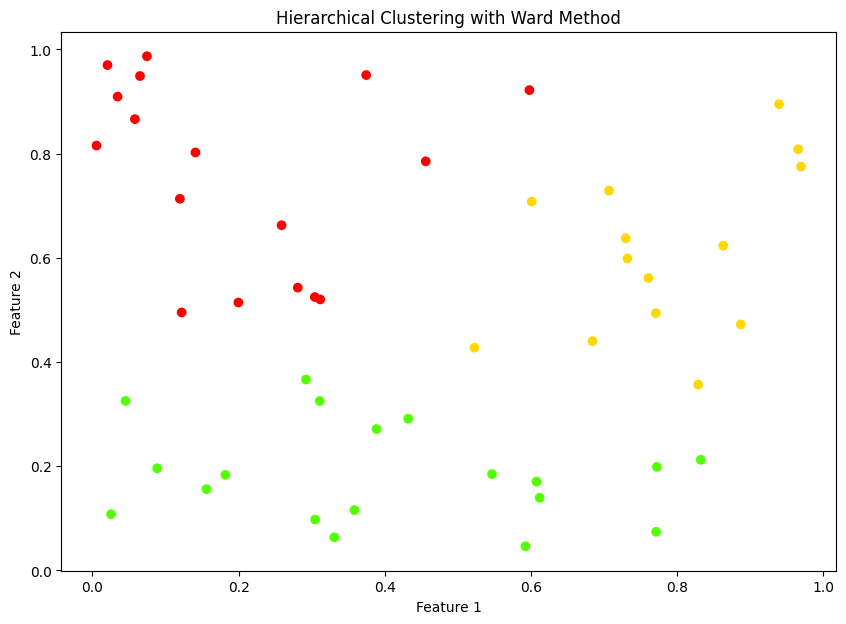

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Generate sample data
np.random.seed(42)
data = np.random.rand(50, 2)  # 50 points in 2D

# Perform hierarchical clustering using Ward's method
Z = linkage(data, method='ward', metric='euclidean')

# Assign cluster labels
max_clusters = 3
cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')

# Plot scatterplot with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='prism')
plt.title('Hierarchical Clustering with Ward Method')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

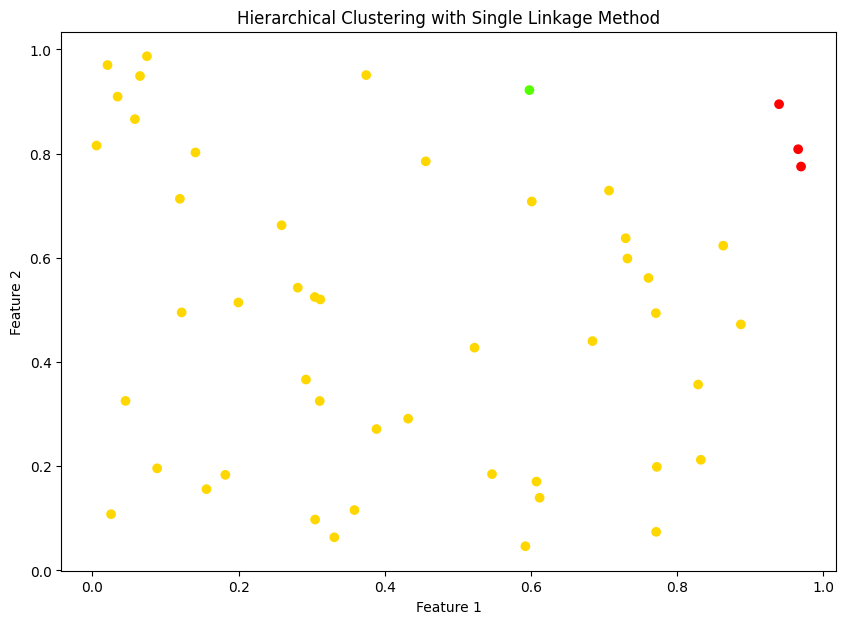

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Generate sample data
np.random.seed(42)
data = np.random.rand(50, 2)  # 50 points in 2D

# Perform hierarchical clustering using Single Linkage method
Z = linkage(data, method='single', metric='euclidean')

# Assign cluster labels
max_clusters = 3
cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')

# Plot scatterplot with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='prism')
plt.title('Hierarchical Clustering with Single Linkage Method')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The 'single' method tends to create clusters that can be more spread out and less compact compared to the 'ward' method. This can be useful in certain scenarios where you want to capture elongated shapes in the data.

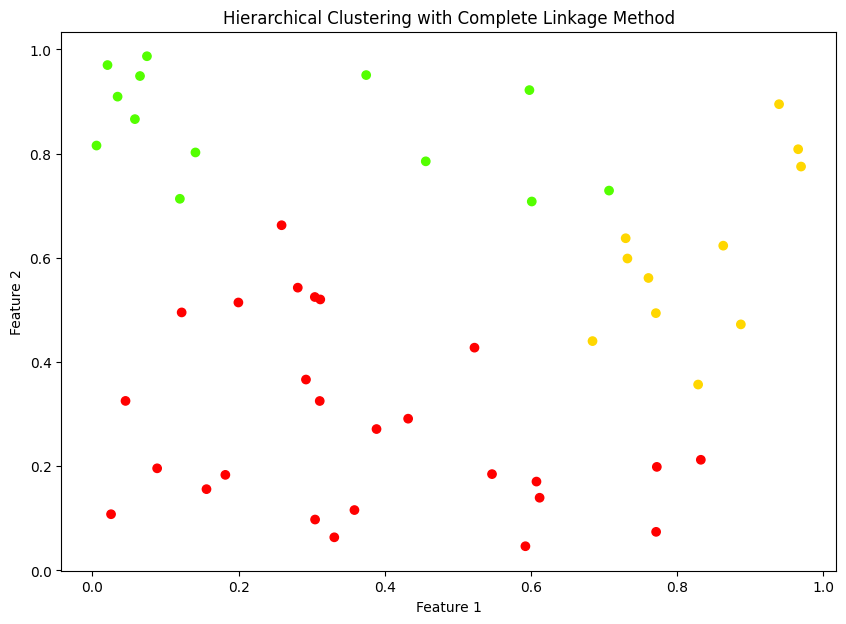

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Generate sample data
np.random.seed(42)
data = np.random.rand(50, 2)  # 50 points in 2D

# Perform hierarchical clustering using Complete Linkage method
Z = linkage(data, method='complete', metric='euclidean')

# Assign cluster labels
max_clusters = 3
cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')

# Plot scatterplot with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='prism')
plt.title('Hierarchical Clustering with Complete Linkage Method')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The 'complete' method tends to create more compact and spherical clusters compared to the 'single' method, which can be useful when you want to avoid elongated clusters.

## visualising clusters

In [1]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Feature1': [0.1, 0.2, 0.4, 0.8, 0.9],
    'Feature2': [0.3, 0.6, 0.5, 0.7, 0.2],
    'Category': ['A', 'A', 'B', 'B', 'A']
}
df = pd.DataFrame(data)
print(df)


   Feature1  Feature2 Category
0       0.1       0.3        A
1       0.2       0.6        A
2       0.4       0.5        B
3       0.8       0.7        B
4       0.9       0.2        A


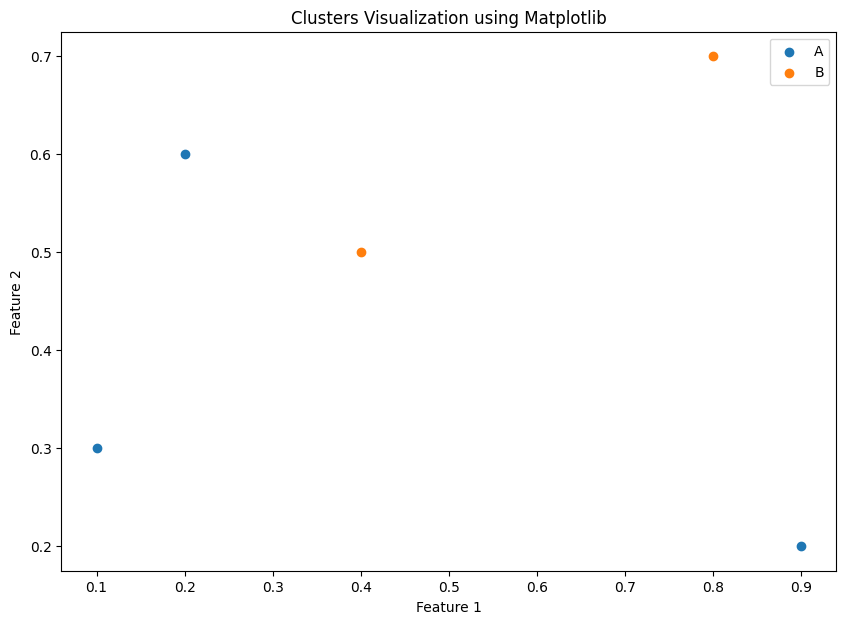

In [2]:

import matplotlib.pyplot as plt

# Plot using Matplotlib
plt.figure(figsize=(10, 7))
for category in df['Category'].unique():
    subset = df[df['Category'] == category]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=category)

plt.title('Clusters Visualization using Matplotlib')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

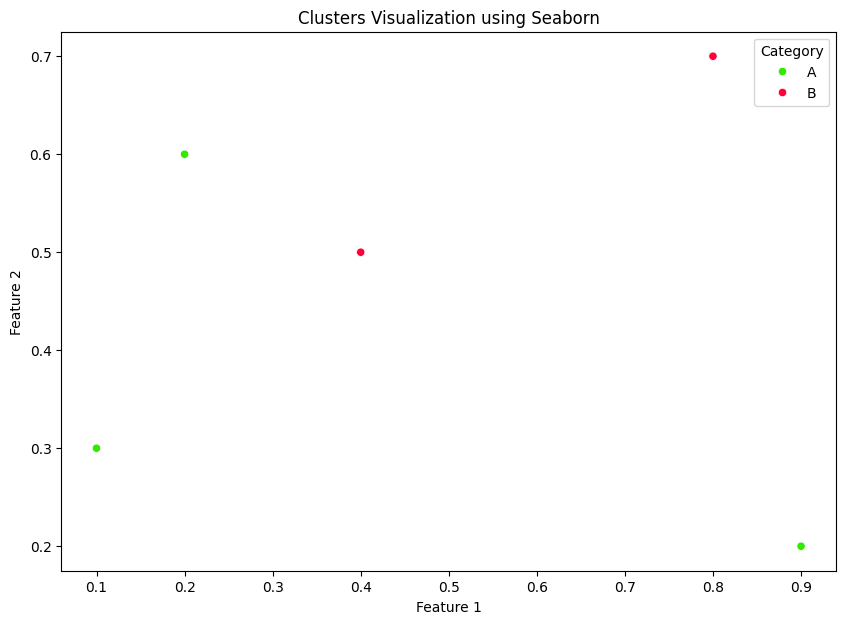

In [3]:
import seaborn as sns

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Category', palette='prism')
plt.title('Clusters Visualization using Seaborn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## dendograms

* branching diagram showing progression in a linkage object as it proceeds through hierarchical clustering algorithm

`from scipy.cluster.hierarchy import dendrogram`

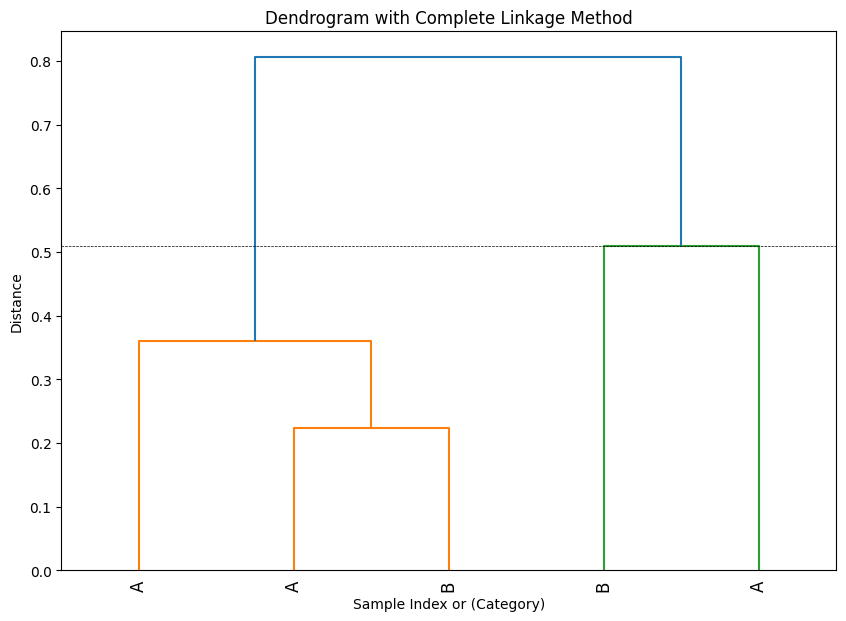

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Create a sample DataFrame
data = {
    'Feature1': [0.1, 0.2, 0.4, 0.8, 0.9],
    'Feature2': [0.3, 0.6, 0.5, 0.7, 0.2],
    'Category': ['A', 'A', 'B', 'B', 'A']
}
df = pd.DataFrame(data)

# Perform hierarchical clustering using Complete Linkage method
Z = linkage(df[['Feature1', 'Feature2']], method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['Category'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram with Complete Linkage Method')
plt.xlabel('Sample Index or (Category)')
plt.ylabel('Distance')

# Draw horizontal lines to indicate the number of clusters
max_clusters = 3
cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
plt.axhline(y=Z[-(max_clusters-1), 2], c='k', ls='--', lw=0.5)

plt.show()

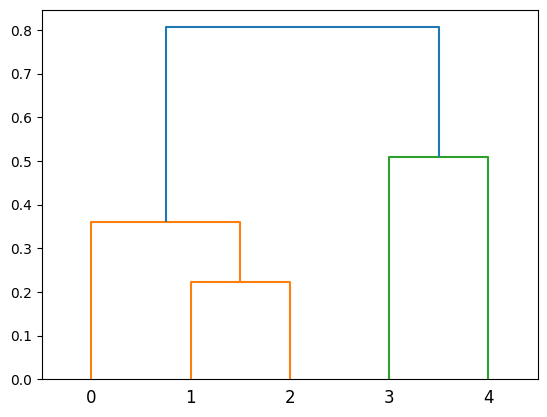

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Create a sample DataFrame
data = {
    'Feature1': [0.1, 0.2, 0.4, 0.8, 0.9],
    'Feature2': [0.3, 0.6, 0.5, 0.7, 0.2],
    'Category': ['A', 'A', 'B', 'B', 'A']
}
df = pd.DataFrame(data)

# Perform hierarchical clustering using Complete Linkage method
Z = linkage(df[['Feature1', 'Feature2']], method='complete', metric='euclidean')

# Plot dendrogram
dn = dendrogram(Z)
plt.show()

## limitations of hierarchical cluster

* increasing runtime with data points
* quadratic increase of runtime
* can't use it with large datasets




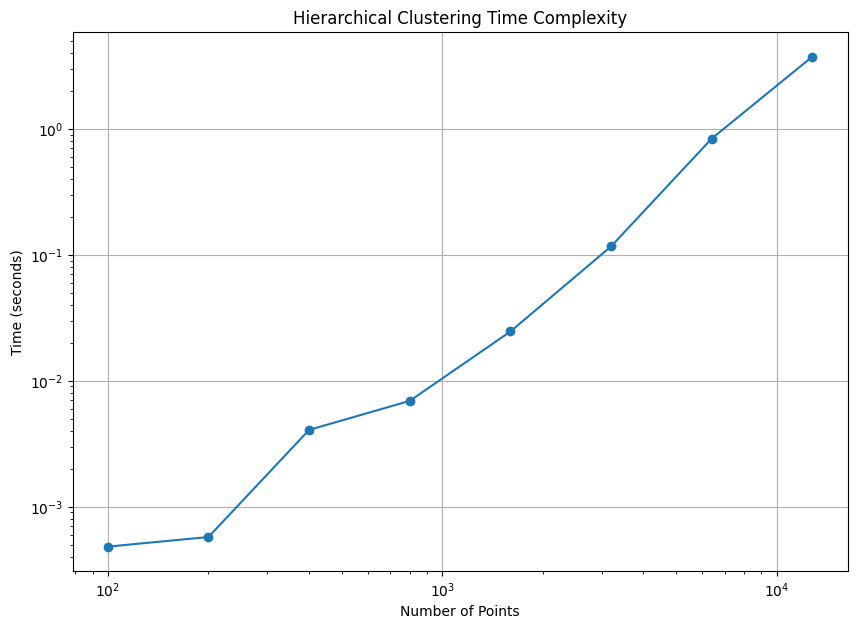

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import timeit

# Function to perform hierarchical clustering and measure time
def measure_linkage_time(num_points):
    data = np.random.rand(num_points, 2)
    start_time = timeit.default_timer()
    linkage(data, method='complete', metric='euclidean')
    end_time = timeit.default_timer()
    return end_time - start_time

# Measure time for different numbers of points
num_points_list = [100, 200, 400, 800, 1600, 3200, 6400, 12800]
times = [measure_linkage_time(num_points) for num_points in num_points_list]

# Create a DataFrame for plotting
df = pd.DataFrame({'num_points': num_points_list, 'time': times})

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(df['num_points'], df['time'], marker='o')
plt.title('Hierarchical Clustering Time Complexity')
plt.xlabel('Number of Points')
plt.ylabel('Time (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [11]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
# import whiten
from scipy.cluster.vq import whiten
fifa = pd.read_csv('fifa_18_dataset.csv')

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


<Axes: xlabel='scaled_sliding_tackle', ylabel='scaled_aggression'>

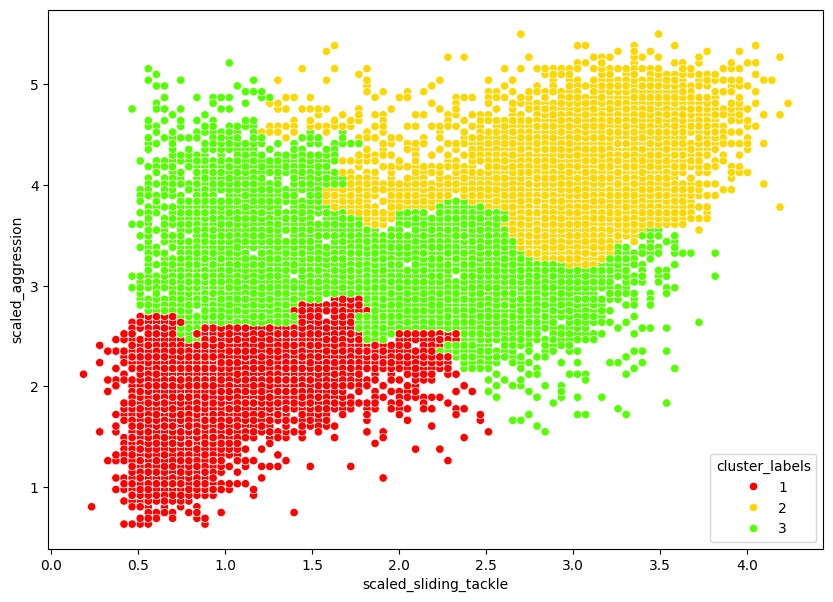

In [14]:
# scale 'sliding_tackle' and 'aggression'
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
# hclust
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# assign cluster labels
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa, palette='prism')